In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
%matplotlib inline

image = color.rgb2gray(io.imread("xray.jpg"))
image = (image - np.min(image)) / (np.max(image) - np.min(image))

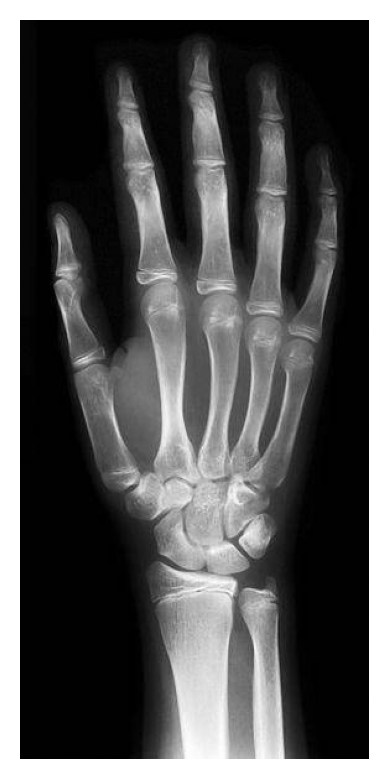

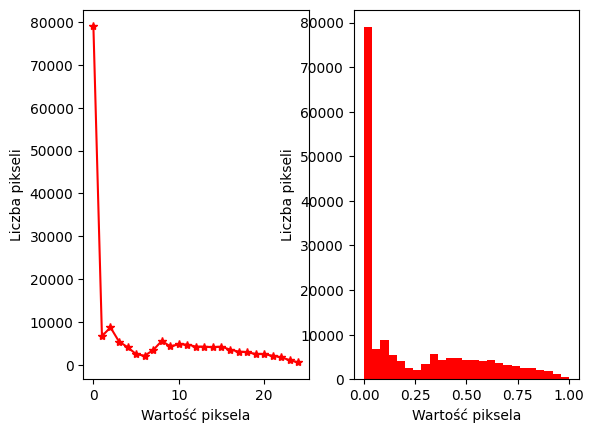

In [ ]:
no_bins = 25
np_histogram, _ = np.histogram(image.ravel(), bins=no_bins)

plt.figure(dpi=200)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(np_histogram, "r*-")
plt.xlabel("Wartość piksela")
plt.ylabel("Liczba pikseli")
plt.subplot(1, 2, 2)
plt.hist(image.ravel(), color='red', bins=no_bins)
plt.xlabel("Wartość piksela")
plt.ylabel("Liczba pikseli")
plt.show()

In [ ]:
flattened_image = image.ravel()
print(flattened_image.shape)
print(np.max(flattened_image))
print(np.min(flattened_image))

(168636,)
1.0
0.0


In [ ]:
def test_hist(hist_fun, image, bins=100):
  our_histogram = hist_fun(image, bins)

  plt.figure(dpi=200, figsize=(10, 3))

  plt.subplot(1, 3, 1)
  plt.plot(np_histogram, "r*-")
  plt.title("Numpy histogram")

  plt.subplot(1, 3, 2)
  plt.plot(our_histogram, "g*-")
  plt.title("Our histogram")

  plt.subplot(1, 3, 3)
  plt.plot(np.abs(np_histogram.ravel() - our_histogram), "g*-")
  plt.title("Difference")

  plt.show()
  print("SAD: ", np.sum(np.abs(np_histogram.ravel() - our_histogram)))

In [ ]:
def our_hist_1(image, bins):
  histogram = np.zeros(bins)
  flattened_image = image.ravel()

  bin_width = (np.max(flattened_image) - np.min(flattened_image)) / bins
  print("Bin width: ", bin_width)

  for i in range(bins):
    for pixel in flattened_image:
      if pixel >= i*bin_width and pixel < (i + 1)*bin_width:
        histogram[i] += 1

  return histogram

Bin width:  0.04


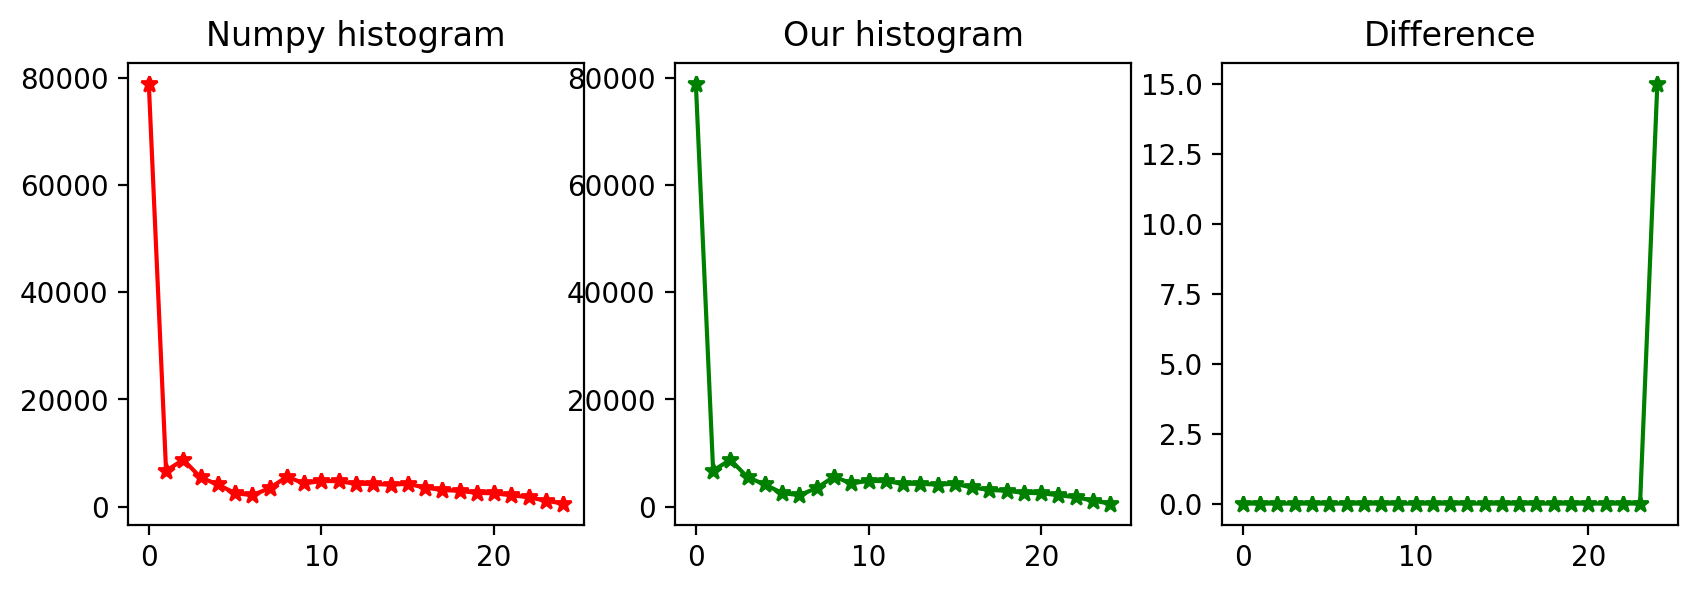

SAD:  15.0


In [ ]:
test_hist(our_hist_1, image, bins=no_bins)

In [ ]:
def our_hist_2(image, bins=100):
  histogram = np.zeros(bins)
  max_val, min_val = np.max(image), np.min(image)
  step = (max_val - min_val) / bins  #bin width

  for value in image.ravel():
    idx = int((value - min_val) / step)
    if(idx == bins):
      histogram[idx - 1] += 1
    else:
      histogram[idx] += 1
  return histogram

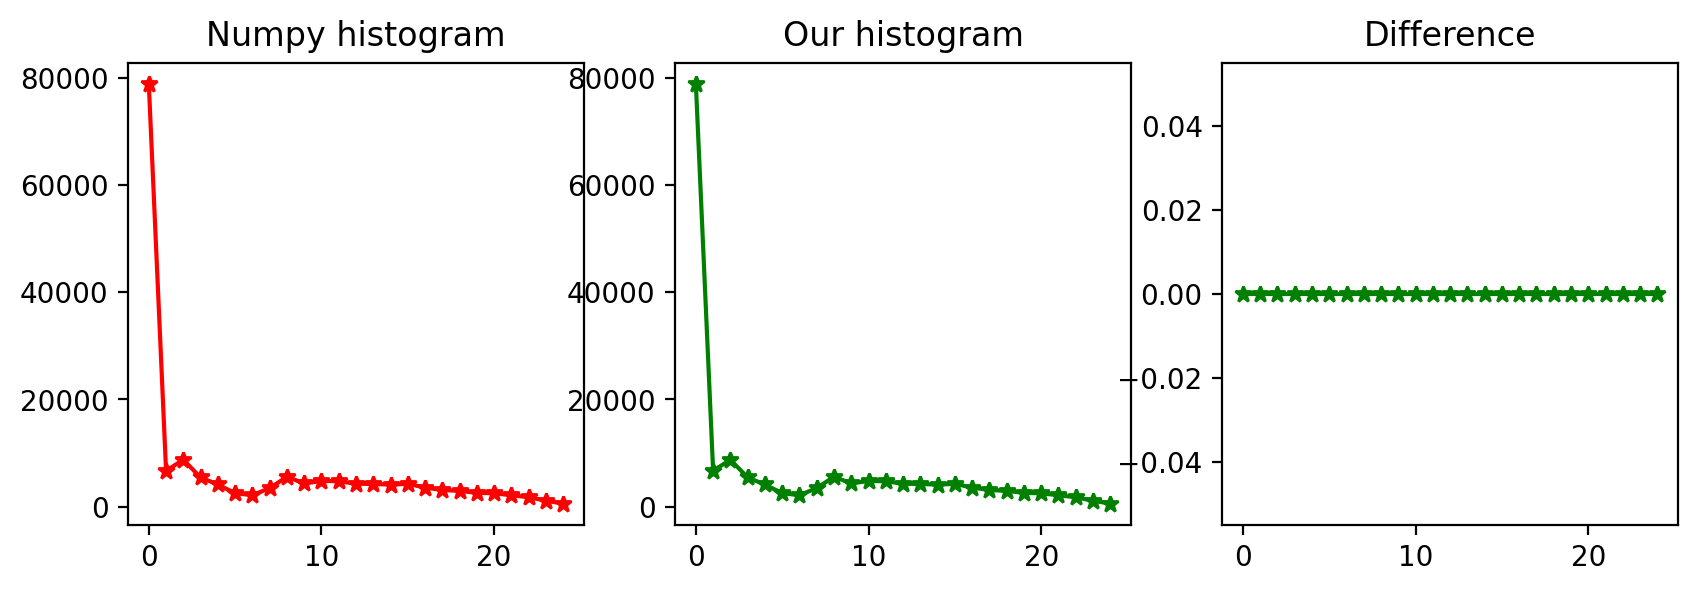

SAD:  0.0


In [ ]:
test_hist(our_hist_2, image.ravel(), bins=no_bins)

In [ ]:
def histogram_equalization(image, bins=100):
    flattened_image = image.ravel()
    equalized_image = np.zeros(image.shape)

    hist = our_hist_1(image, bins=bins)

    cdf = np.cumsum(hist)
    print("cdf: ", cdf)
    cdf_normal = cdf / float(cdf.max())
    print("cdf normal: ", cdf_normal)

    hist_bins = np.linspace(flattened_image.min(), flattened_image.max(), bins+1)
    print("hist_bins: ", hist_bins)

    equalized_image = np.interp(flattened_image, hist_bins[:-1], cdf_normal)
    equalized_image = equalized_image.reshape(image.shape)

    return equalized_image

Bin width:  0.04
cdf:  [ 78943.  85648.  94398.  99841. 103976. 106484. 108625. 112080. 117661.
 121999. 126786. 131537. 135802. 140043. 144147. 148398. 151961. 155065.
 158010. 160577. 163072. 165197. 166956. 168058. 168621.]
cdf normal:  [0.46816826 0.50793199 0.55982351 0.592103   0.61662545 0.63149904
 0.64419616 0.66468589 0.69778379 0.72351012 0.75189923 0.78007484
 0.80536825 0.83051933 0.85485794 0.88006832 0.90119855 0.91960669
 0.93707189 0.95229538 0.96709188 0.97969411 0.99012579 0.99666115
 1.        ]
hist_bins:  [0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.  ]


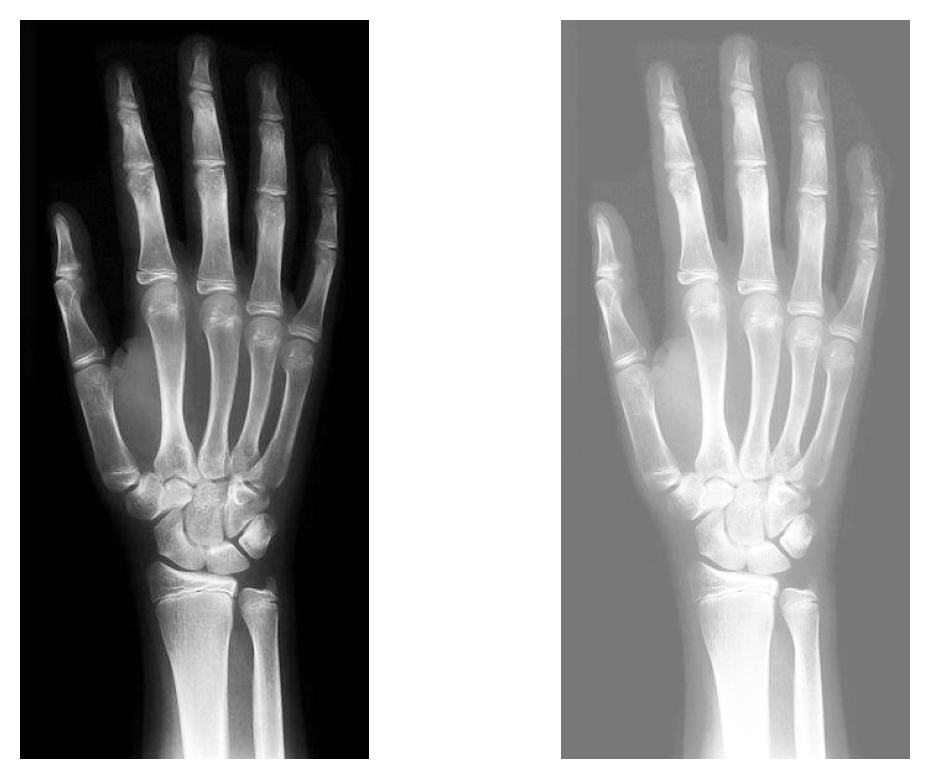

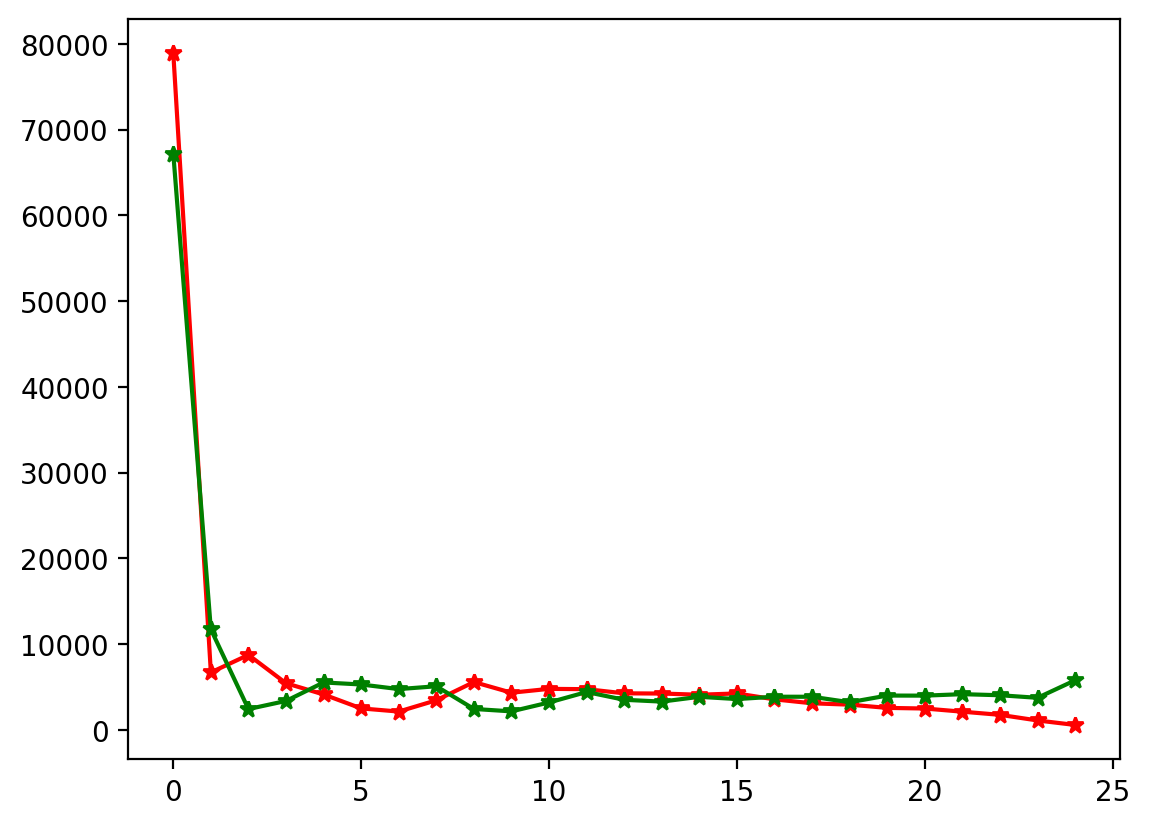

In [ ]:
equalized_image = histogram_equalization(image, bins=no_bins)
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.figure(dpi=200)
plt.plot(our_hist_2(image, bins=no_bins), "r*-")
plt.plot(our_hist_2(equalized_image, bins=no_bins), "g*-")
plt.show()

In [ ]:
def histogram_matching(image_1, image_2): # from image_1 to image_2
    flattened_image_1 = image_1.ravel()
    flattened_image_2 = image_2.ravel()

    unique_val_1, counts_1 = np.unique(flattened_image_1, return_counts=True)
    unique_val_2, counts_2 = np.unique(flattened_image_2, return_counts=True)

    cdf_1 = np.cumsum(counts_1)
    cdf_2 = np.cumsum(counts_2)

    interp_val = np.interp(cdf_1, cdf_2, unique_val_2)

    matched_image = np.interp(flattened_image_1, unique_val_1, interp_val)
    matched_image = matched_image.reshape(image_1.shape)

    return matched_image

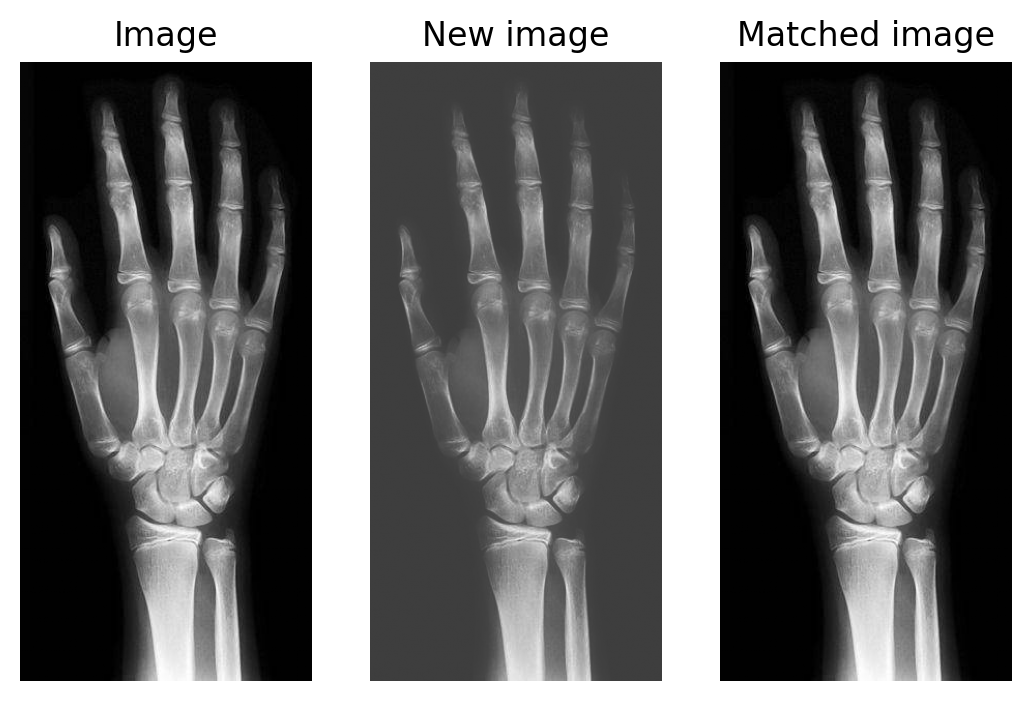

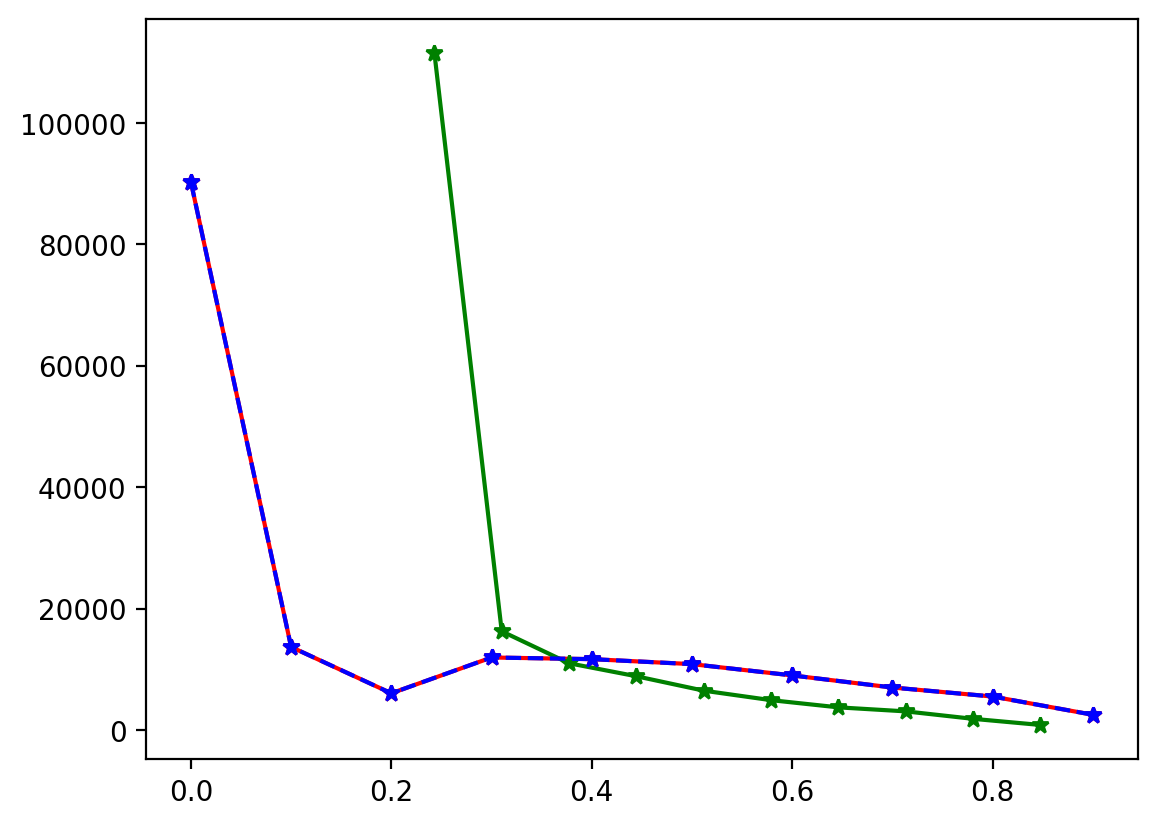

In [ ]:
new_image = 0.672*image**2 + 0.243
matched_image = histogram_matching(new_image, image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.title("Image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(new_image, cmap='gray', vmin=0, vmax=1)
plt.title("New image")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(matched_image, cmap='gray', vmin=0, vmax=1)
plt.title("Matched image")
plt.axis('off')

plt.figure(dpi=200)
hist, bins = np.histogram(image)
new_hist, new_bins = np.histogram(new_image)
matched_hist, matched_bins = np.histogram(matched_image)
plt.plot(bins[:-1], hist, "r*-")
plt.plot(new_bins[:-1], new_hist, "g*-")
plt.plot(matched_bins[:-1], matched_hist, "b*--")
plt.show()

In [ ]:
image_fft = np.fft.fft2(image)
fft_mag = np.log(np.abs(image_fft))
image_back = np.abs(np.fft.ifft2(image_fft))

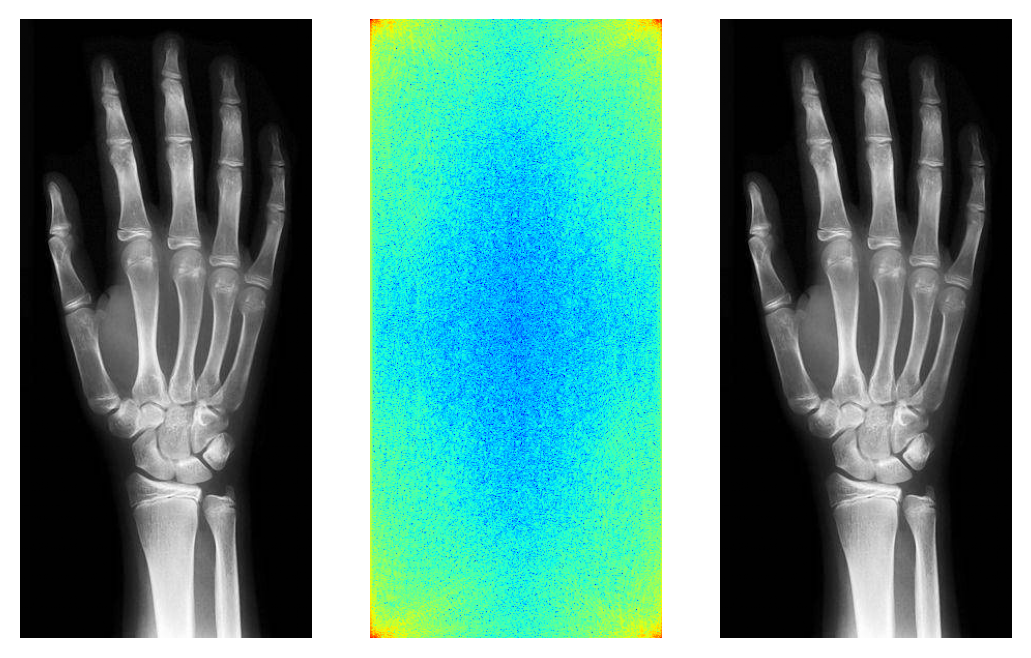

In [ ]:
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(fft_mag, cmap='jet')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image_back, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()

In [ ]:
image_fft = np.fft.fft2(image)
image_fft_shifted = np.fft.fftshift(image_fft) #moving zero to the center
fft_mag = np.log(np.abs(image_fft_shifted))

image_ifft_shifted = np.fft.ifftshift(image_fft_shifted)
image_back = np.fft.ifft2(image_ifft_shifted)
image_back = np.abs(image_back)

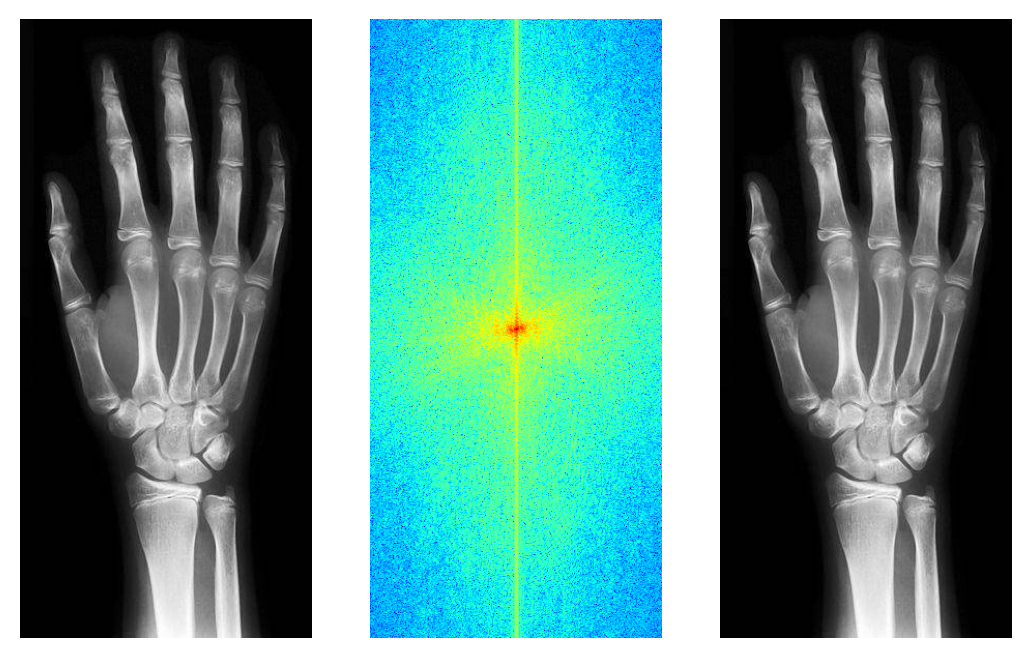

In [ ]:
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(fft_mag, cmap='jet')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image_back, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()